In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import python classes and packages
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA# define arima class
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import BayesianRidge #bayesian ridde class loading
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor #extension decision tree

In [28]:
#read and display dataset values
dataset = pd.read_csv("Dataset/selfharm_and_mental_signals_time_series_data.csv")
dataset.fillna(0, inplace = True)#remove missing values
dataset.head()

,date,MS-Pos,MS-Neg,MS-Amb,MS-Neu,ME-Ang,ME-Dis,ME-Fea,ME-Joy,ME-Sad,ME-Sur,ME-Neu,M-NST,M-ST,GH-Death,GH-Injure
0,2017-10-31,0.124349,0.217099,0.002639,0.655914,0.060558,0.001121,0.010423,0.180025,0.042351,0.098291,0.607230,0.734283,0.265717,56.0,224.0
1,2017-11-30,0.122213,0.199027,0.002266,0.676494,0.041806,0.001326,0.016026,0.182476,0.033406,0.104943,0.620016,0.753447,0.246553,45.0,239.0
2,2017-12-31,0.103728,0.244845,0.002444,0.648983,0.057183,0.001756,0.011395,0.179296,0.040314,0.113988,0.596068,0.743003,0.256997,60.0,255.0
3,2018-01-31,0.096537,0.269589,0.002332,0.631543,0.055182,0.001676,0.012206,0.152939,0.024959,0.116959,0.636079,0.746279,0.253721,88.0,336.0
4,2018-02-28,0.093888,0.288119,0.001998,0.615995,0.063627,0.001289,0.011892,0.163508,0.035321,0.118380,0.605983,0.728080,0.271920,60.0,299.0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
date         42 non-null object
MS-Pos       42 non-null float64
MS-Neg       42 non-null float64
MS-Amb       42 non-null float64
MS-Neu       42 non-null float64
ME-Ang       42 non-null float64
ME-Dis       42 non-null float64
ME-Fea       42 non-null float64
ME-Joy       42 non-null float64
ME-Sad       42 non-null float64
ME-Sur       42 non-null float64
ME-Neu       42 non-null float64
M-NST        42 non-null float64
M-ST         42 non-null float64
GH-Death     42 non-null float64
GH-Injure    42 non-null float64
dtypes: float64(15), object(1)
memory usage: 5.4+ KB


In [4]:
#extract training features and label from dataset
dataset = dataset.values
X = dataset[:,1:dataset.shape[1]-2] #xtract training features
injury = dataset[:,dataset.shape[1]-2] #get injury values from dataset
death = dataset[:,dataset.shape[1]-1] #get death values
#perform shuffling as data preprocessing
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
injury = injury[indices]
death = death[indices]
print("Processed Training Features : "+str(X))

Processed Training Features : [[0.0996727716727716 0.2584126984126984 0.0042783882783882
  0.6376361416361417 0.0523858363858363 0.0021196581196581
  0.013010989010988998 0.1646007326007326 0.0325274725274725
  0.1079267399267399 0.6274285714285714 0.7351697191697192
  0.2648302808302808]
 [0.09915626525346902 0.2724443902098877 0.0046283383306603
  0.6237710062059828 0.0546335680914859 0.0016996722683215
  0.0100847221253748 0.1577644515724147 0.0265584687260302
  0.10191932222299699 0.6473397949933757 0.7482654626595077
  0.2517345373404923]
 [0.11543307009416802 0.2674696196512693 0.0032353416962014
  0.6138619685583612 0.0490105246645784 0.0014951200262748
  0.0170688784638989 0.20307161379824198 0.0385152722834159
  0.1003102986808629 0.5905282920827267 0.7461531297028878
  0.2538468702971122]
 [0.0970662470238399 0.2562307763051675 0.0049151347319156
  0.6417878419390769 0.0514811824935367 0.0017678135314374
  0.0133250222254013 0.1634972052196482 0.0251581324531733
  0.097444334

In [5]:
#split dataset into train and test
injury_X_train, injury_X_test, injury_y_train, injury_y_test = train_test_split(X, injury, test_size=0.2)
death_X_train, death_X_test, death_y_train, death_y_test = train_test_split(X, death, test_size=0.2)
print("Dataset Train & Test Splits")
print("Total records found in dataset : "+str(X.shape[0]))
print("80% dataset used for training  : "+str(injury_X_train.shape[0]))
print("20% dataset user for testing   : "+str(injury_X_test.shape[0]))

Dataset Train & Test Splits
Total records found in dataset : 42
80% dataset used for training  : 33
20% dataset user for testing   : 9


In [6]:
#define global variables to calculate mae, mape and Rmse
rmse = []
mae = []
mape = []

In [7]:
#function to calculate RMSE and other metrics
def calculateMetrics(algorithm, predict, test_labels, info):
    mape_value = mean_squared_error(test_labels, predict)
    rmse_value = sqrt(mape_value)
    mae_value= mean_absolute_error(test_labels, predict)
    predict = predict.ravel()
    test_label = test_labels.ravel()
    mae.append(mae_value)
    rmse.append(rmse_value)
    mape.append(mape_value)
    print(algorithm+" "+info+" MAPE      : "+str(mape_value))
    print(algorithm+" "+info+" RMSE     : "+str(rmse_value))
    print(algorithm+" "+info+" MAE : "+str(mae_value)+"\n")    
    for i in range(len(predict)):
        print("True "+info +" : "+str(test_label[i])+" Predicted "+info+" : "+str(predict[i]))
    plt.plot(test_label, color = 'red', label = 'True '+info)
    plt.plot(predict, color = 'green', label = 'Predicted '+info)
    plt.title(algorithm+' '+info+" Prediction")
    plt.xlabel('Test Data')
    plt.ylabel('Predicted '+info)
    plt.legend()
    plt.show()    

ARIMA Injury MAPE      : 31206.357056764136
ARIMA Injury RMSE     : 176.65321128347523
ARIMA Injury MAE : 145.3959077350732

True Injury : 332.0 Predicted Injury : 101.87488833370452
True Injury : 113.0 Predicted Injury : 183.33779709361303
True Injury : 134.0 Predicted Injury : 135.50101262160075
True Injury : 321.0 Predicted Injury : 129.38912461084246
True Injury : 375.0 Predicted Injury : 135.1407509979681
True Injury : 82.0 Predicted Injury : 127.71282878874803
True Injury : 366.0 Predicted Injury : 122.07802160597375
True Injury : 91.0 Predicted Injury : 118.93926624247709
True Injury : 372.0 Predicted Injury : 114.44494958229119


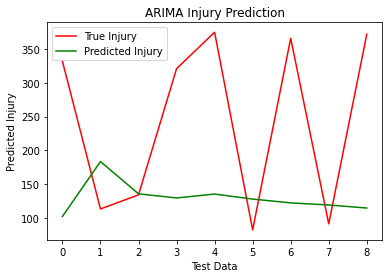

In [8]:
#now train arima on injury data
model = ARIMA(injury_y_train, order=(3, 1, 2))  
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(injury_y_test.shape[0], alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=pd.DataFrame(injury_y_test, columns=['Data']).index)
calculateMetrics("ARIMA", fc_series.ravel(), injury_y_test, "Injury")

ARIMA Death MAPE      : 109690.15910675655
ARIMA Death RMSE     : 331.1950469236467
ARIMA Death MAE : 289.3120524075538

True Death : 655.0 Predicted Death : 929.5692860959505
True Death : 224.0 Predicted Death : 729.4224394896244
True Death : 336.0 Predicted Death : 731.9391918298959
True Death : 846.0 Predicted Death : 822.1813010939973
True Death : 900.0 Predicted Death : 836.8278414045907
True Death : 453.0 Predicted Death : 807.8414493254604
True Death : 310.0 Predicted Death : 803.655342253253
True Death : 1021.0 Predicted Death : 820.7040704722012
True Death : 538.0 Predicted Death : 830.0939756445894


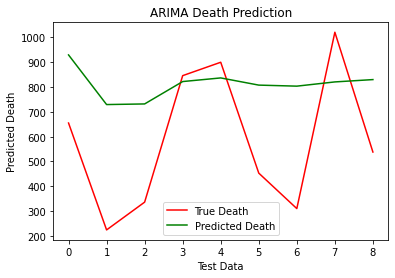

In [9]:
#now train arima on Death data
model = ARIMA(death_y_train, order=(3, 1, 2))  
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(death_y_test.shape[0], alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=pd.DataFrame(death_y_test, columns=['Data']).index)
calculateMetrics("ARIMA", fc_series.ravel(), death_y_test, "Death")

Bayesian Ridge Injury MAPE      : 3459.7197129337874
Bayesian Ridge Injury RMSE     : 58.81938211961927
Bayesian Ridge Injury MAE : 50.84912929453166

True Injury : 332.0 Predicted Injury : 363.07609171181986
True Injury : 113.0 Predicted Injury : 155.59798892686706
True Injury : 134.0 Predicted Injury : 168.8075778697269
True Injury : 321.0 Predicted Injury : 359.136509500775
True Injury : 375.0 Predicted Injury : 351.2517583544284
True Injury : 82.0 Predicted Injury : 166.8263789937692
True Injury : 366.0 Predicted Injury : 252.68960477387202
True Injury : 91.0 Predicted Injury : 159.22943882220736
True Injury : 372.0 Predicted Injury : 351.09045904608


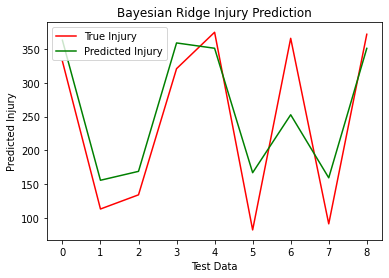

In [10]:
#now train Bayseian ridge algorithm on injury data and calculate performnace metrics
br = BayesianRidge()
br.fit(injury_X_train, injury_y_train)
predict = br.predict(injury_X_test)
calculateMetrics("Bayesian Ridge", predict, injury_y_test, "Injury")

Bayesian Ridge Death MAPE      : 49669.01902219516
Bayesian Ridge Death RMSE     : 222.8654729252496
Bayesian Ridge Death MAE : 167.40483368527094

True Death : 655.0 Predicted Death : 505.454326597742
True Death : 224.0 Predicted Death : 541.0955359308512
True Death : 336.0 Predicted Death : 513.807789808163
True Death : 846.0 Predicted Death : 906.1548051820176
True Death : 900.0 Predicted Death : 872.6085499906171
True Death : 453.0 Predicted Death : 517.2864628792915
True Death : 310.0 Predicted Death : 526.3173009653694
True Death : 1021.0 Predicted Death : 534.0222605460955
True Death : 538.0 Predicted Death : 530.9332544637998


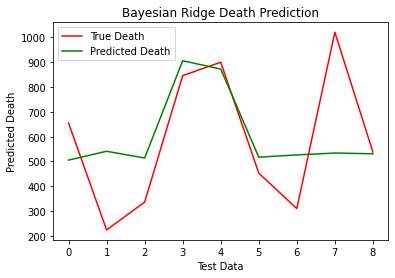

In [11]:
#now train Bayseian ridge algorithm on death data and calculate performnace metrics
br = BayesianRidge()
br.fit(death_X_train, death_y_train)
predict = br.predict(death_X_test)
calculateMetrics("Bayesian Ridge", predict, death_y_test, "Death")

Linear SVR Injury MAPE      : 18960.702960888
Linear SVR Injury RMSE     : 137.69786839631178
Linear SVR Injury MAE : 128.33879068825806

True Injury : 332.0 Predicted Injury : 184.54194139815343
True Injury : 113.0 Predicted Injury : 182.88296600418752
True Injury : 134.0 Predicted Injury : 183.00217775062114
True Injury : 321.0 Predicted Injury : 184.6381631916371
True Injury : 375.0 Predicted Injury : 184.63904403732613
True Injury : 82.0 Predicted Injury : 182.9595972935057
True Injury : 366.0 Predicted Injury : 184.24098976907825
True Injury : 91.0 Predicted Injury : 182.87113869910704
True Injury : 372.0 Predicted Injury : 184.60662515690393


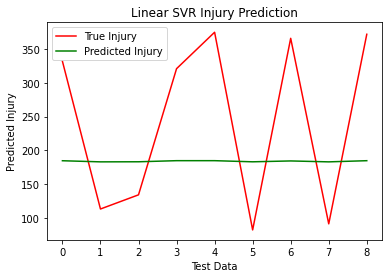

In [12]:
#now train Linear SVR algorithm on injury data and calculate performnace metrics
svr = SVR(kernel="linear")
svr.fit(injury_X_train, injury_y_train)
predict = svr.predict(injury_X_test)
calculateMetrics("Linear SVR", predict, injury_y_test, "Injury")

Kernel SVR Death MAPE      : 73297.85799091416
Kernel SVR Death RMSE     : 270.7357715391783
Kernel SVR Death MAE : 234.1438375362553

True Death : 655.0 Predicted Death : 550.133698140695
True Death : 224.0 Predicted Death : 550.1584524307696
True Death : 336.0 Predicted Death : 550.0752289060985
True Death : 846.0 Predicted Death : 552.1724499723091
True Death : 900.0 Predicted Death : 551.8807653576412
True Death : 453.0 Predicted Death : 550.0783358921326
True Death : 310.0 Predicted Death : 550.1895895827814
True Death : 1021.0 Predicted Death : 550.1581615749895
True Death : 538.0 Predicted Death : 550.1380060601507


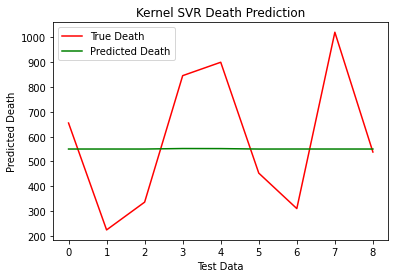

In [13]:
#now train linera svr algorithm on death data and calculate performnace metrics
svr = SVR(kernel="linear")
svr.fit(death_X_train, death_y_train)
predict = svr.predict(death_X_test)
calculateMetrics("Kernel SVR", predict, death_y_test, "Death")

XGBoost Injury MAPE      : 922.5346768842298
XGBoost Injury RMSE     : 30.373255948024898
XGBoost Injury MAE : 27.066800435384113

True Injury : 332.0 Predicted Injury : 360.0073
True Injury : 113.0 Predicted Injury : 156.46077
True Injury : 134.0 Predicted Injury : 172.66608
True Injury : 321.0 Predicted Injury : 359.91125
True Injury : 375.0 Predicted Injury : 360.00067
True Injury : 82.0 Predicted Injury : 125.55053
True Injury : 366.0 Predicted Injury : 372.59384
True Injury : 91.0 Predicted Injury : 109.08026
True Injury : 372.0 Predicted Injury : 360.66815


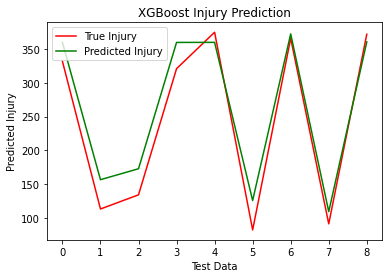

In [14]:
#now train Linear XGBoost algorithm on injury data and calculate performnace metrics
xgb = XGBRegressor()
xgb.fit(injury_X_train, injury_y_train)
predict = xgb.predict(injury_X_test)
calculateMetrics("XGBoost", predict, injury_y_test, "Injury")

XGBoost Death MAPE      : 36537.15958201461
XGBoost Death RMSE     : 191.14695807680175
XGBoost Death MAE : 128.40318128797742

True Death : 655.0 Predicted Death : 557.0633
True Death : 224.0 Predicted Death : 335.77255
True Death : 336.0 Predicted Death : 415.96136
True Death : 846.0 Predicted Death : 927.3416
True Death : 900.0 Predicted Death : 841.77466
True Death : 453.0 Predicted Death : 487.88998
True Death : 310.0 Predicted Death : 464.516
True Death : 1021.0 Predicted Death : 506.4584
True Death : 538.0 Predicted Death : 560.4435


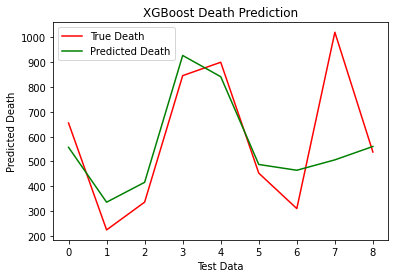

In [15]:
#now train XGBoost algorithm on death data and calculate performnace metrics
xgb = XGBRegressor()
xgb.fit(death_X_train, death_y_train)
predict = xgb.predict(death_X_test)
calculateMetrics("XGBoost", predict, death_y_test, "Death")

Random Forest Injury MAPE      : 2676.277777777778
Random Forest Injury RMSE     : 51.73275343317595
Random Forest Injury MAE : 41.77777777777778

True Injury : 332.0 Predicted Injury : 414.0
True Injury : 113.0 Predicted Injury : 123.0
True Injury : 134.0 Predicted Injury : 168.5
True Injury : 321.0 Predicted Injury : 368.5
True Injury : 375.0 Predicted Injury : 376.0
True Injury : 82.0 Predicted Injury : 52.5
True Injury : 366.0 Predicted Injury : 448.5
True Injury : 91.0 Predicted Injury : 168.5
True Injury : 372.0 Predicted Injury : 360.5


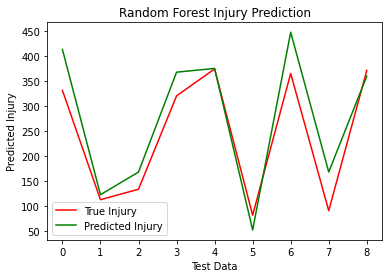

In [16]:
#now train random forest algorithm on injury data and calculate performnace metrics
rf = RandomForestRegressor(n_estimators=2, max_depth=30)
rf.fit(injury_X_train, injury_y_train)
predict = rf.predict(injury_X_test)
calculateMetrics("Random Forest", predict, injury_y_test, "Injury")

Random Forest Death MAPE      : 53230.194444444445
Random Forest Death RMSE     : 230.7166973681022
Random Forest Death MAE : 154.5

True Death : 655.0 Predicted Death : 564.0
True Death : 224.0 Predicted Death : 355.5
True Death : 336.0 Predicted Death : 277.0
True Death : 846.0 Predicted Death : 919.5
True Death : 900.0 Predicted Death : 964.5
True Death : 453.0 Predicted Death : 564.0
True Death : 310.0 Predicted Death : 564.0
True Death : 1021.0 Predicted Death : 418.0
True Death : 538.0 Predicted Death : 535.0


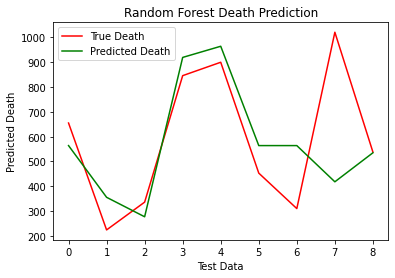

In [17]:
#now train Random Forest algorithm on death data and calculate performnace metrics
rf = RandomForestRegressor(n_estimators=2, max_depth=20)
rf.fit(death_X_train, death_y_train)
predict = rf.predict(death_X_test)
calculateMetrics("Random Forest", predict, death_y_test, "Death")

0:	learn: 129.8521362	total: 149ms	remaining: 149ms
1:	learn: 126.7955858	total: 149ms	remaining: 0us
CatBoost Injury MAPE      : 13997.632111482339
CatBoost Injury RMSE     : 118.31158908358191
CatBoost Injury MAE : 116.25685634722484

True Injury : 332.0 Predicted Injury : 235.83876366356557
True Injury : 113.0 Predicted Injury : 212.98652090205567
True Injury : 134.0 Predicted Injury : 217.73349083159638
True Injury : 321.0 Predicted Injury : 229.95152140169432
True Injury : 375.0 Predicted Injury : 229.95152140169432
True Injury : 82.0 Predicted Injury : 219.12177320874935
True Injury : 366.0 Predicted Injury : 234.78436222643225
True Injury : 91.0 Predicted Injury : 216.83485453957408
True Injury : 372.0 Predicted Injury : 235.83876366356557


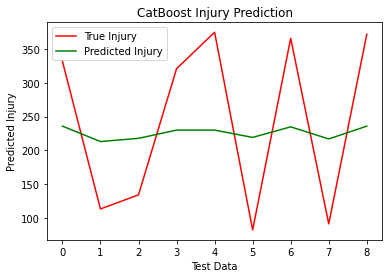

In [18]:
#now train catboost algorithm on injury data and calculate performnace metrics
cb_reg = cb.CatBoostRegressor(iterations=2, learning_rate=0.1)
cb_reg.fit(injury_X_train, injury_y_train)
predict = cb_reg.predict(injury_X_test)
calculateMetrics("CatBoost", predict, injury_y_test, "Injury")

0:	learn: 274.3978790	total: 728us	remaining: 728us
1:	learn: 263.8017742	total: 1.05ms	remaining: 0us
CatBoost Death MAPE      : 72318.13191863683
CatBoost Death RMSE     : 268.920307746806
CatBoost Death MAE : 236.1753011520439

True Death : 655.0 Predicted Death : 646.5933812989348
True Death : 224.0 Predicted Death : 645.0186157914126
True Death : 336.0 Predicted Death : 642.5837602076522
True Death : 846.0 Predicted Death : 689.8974908661097
True Death : 900.0 Predicted Death : 689.8974908661097
True Death : 453.0 Predicted Death : 648.2271558289647
True Death : 310.0 Predicted Death : 643.3848412613827
True Death : 1021.0 Predicted Death : 633.2986991496223
True Death : 538.0 Predicted Death : 645.0503994597593


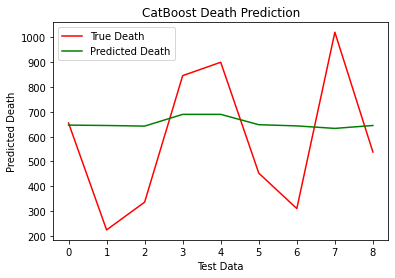

In [19]:
#now train catboost algorithm on death data and calculate performnace metrics
cb_reg = cb.CatBoostRegressor(iterations=2, learning_rate=0.1)
cb_reg.fit(death_X_train, death_y_train)
predict = cb_reg.predict(death_X_test)
calculateMetrics("CatBoost", predict, death_y_test, "Death")

Extension Decision Tree Injury MAPE      : 68.0
Extension Decision Tree Injury RMSE     : 8.246211251235321
Extension Decision Tree Injury MAE : 3.3333333333333335

True Injury : 332.0 Predicted Injury : 332.0
True Injury : 113.0 Predicted Injury : 113.0
True Injury : 134.0 Predicted Injury : 158.0
True Injury : 321.0 Predicted Injury : 321.0
True Injury : 375.0 Predicted Injury : 375.0
True Injury : 82.0 Predicted Injury : 88.0
True Injury : 366.0 Predicted Injury : 366.0
True Injury : 91.0 Predicted Injury : 91.0
True Injury : 372.0 Predicted Injury : 372.0


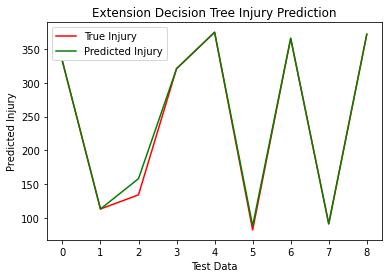

In [20]:
#now train decision tree as extension model on injury data
dt_rg = DecisionTreeRegressor()
dt_rg.fit(X[0:35], injury[0:35])
predict = dt_rg.predict(injury_X_test)
calculateMetrics("Extension Decision Tree", predict, injury_y_test, "Injury")

Extension Decision Tree Death MAPE      : 1906.7777777777778
Extension Decision Tree Death RMSE     : 43.666666666666664
Extension Decision Tree Death MAE : 14.555555555555555

True Death : 655.0 Predicted Death : 655.0
True Death : 224.0 Predicted Death : 224.0
True Death : 336.0 Predicted Death : 336.0
True Death : 846.0 Predicted Death : 846.0
True Death : 900.0 Predicted Death : 900.0
True Death : 453.0 Predicted Death : 453.0
True Death : 310.0 Predicted Death : 310.0
True Death : 1021.0 Predicted Death : 1021.0
True Death : 538.0 Predicted Death : 407.0


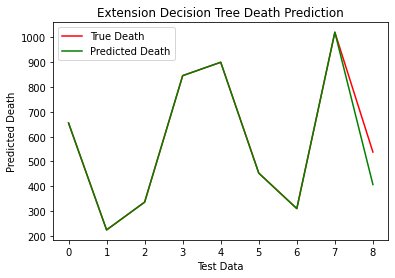

In [21]:
#now train decision tree algorithm as extension on death data and calculate performnace metrics
dt_death = DecisionTreeRegressor()
dt_death.fit(X[0:36], death[0:36])
predict = dt_death.predict(death_X_test)
calculateMetrics("Extension Decision Tree", predict, death_y_test, "Death")

In [22]:
#display all algorithms performance on injury data
columns = ["Prediction Type", "Algorithm Name","MAE","RMSE","MAPE"]
values = []
algorithm_names = ["ARIMA","Bayesian Ridge", "Linear SVR", "XGBoost", "Random Forest", "Cat Boost", "Extension Decision Tree"]
i = 0
names = 0
while i < len(mae):
    values.append(["Injury", algorithm_names[names],mae[i],rmse[i],mape[i]])
    i = i + 2
    names = names + 1
temp = pd.DataFrame(values,columns=columns)
temp

,Prediction Type,Algorithm Name,MAE,RMSE,MAPE
0,Injury,ARIMA,145.395908,176.653211,31206.357057
1,Injury,Bayesian Ridge,50.849129,58.819382,3459.719713
2,Injury,Linear SVR,128.338791,137.697868,18960.702961
3,Injury,XGBoost,27.066800,30.373256,922.534677
4,Injury,Random Forest,41.777778,51.732753,2676.277778
5,Injury,Cat Boost,116.256856,118.311589,13997.632111
6,Injury,Extension Decision Tree,3.333333,8.246211,68.000000


In [23]:
#display all algorithms performance on death data
columns = ["Prediction Type", "Algorithm Name","MAE","RMSE","MAPE"]
values = []
algorithm_names = ["ARIMA","Bayesian Ridge", "Linear SVR", "XGBoost", "Random Forest", "Cat Boost", "Extension Decision Tree"]
i = 1
names = 0
while i < len(mae):
    values.append(["Death", algorithm_names[names],mae[i],rmse[i],mape[i]])
    i = i + 2
    names = names + 1
temp = pd.DataFrame(values,columns=columns)
temp

,Prediction Type,Algorithm Name,MAE,RMSE,MAPE
0,Death,ARIMA,289.312052,331.195047,109690.159107
1,Death,Bayesian Ridge,167.404834,222.865473,49669.019022
2,Death,Linear SVR,234.143838,270.735772,73297.857991
3,Death,XGBoost,128.403181,191.146958,36537.159582
4,Death,Random Forest,154.500000,230.716697,53230.194444
5,Death,Cat Boost,236.175301,268.920308,72318.131919
6,Death,Extension Decision Tree,14.555556,43.666667,1906.777778


In [30]:
import joblib
joblib.dump(dt_rg,'model.sav')

['model.sav']

In [31]:
joblib.dump(dt_death,'model1.sav')

['model1.sav']

In [32]:
#perform prediction of injury on test data using extension model
#read test data and predict flood
dataset = pd.read_csv("Dataset/testData.csv")
dataset.fillna(0, inplace = True)
dataset = dataset.values
X = dataset[:,1:dataset.shape[1]]
injury_predict = dt_rg.predict(X) #perform injury prediction using extension decision tree object
death_predict = dt_death.predict(X)#perform death prediction using extension decision tree object
for i in range(len(injury_predict)):
    print("Test Data = "+str(dataset[i])+"=====> Forecasted Injury : "+str(injury_predict[i])+" Forecasted Death : "+str(death_predict[i])+"\n\n")
    

Test Data = ['2019-04-30' 0.1001397518460463 0.2199769598307869 0.005684500764858001
 0.6741987875583086 0.0387622518932598 0.0016052576910728
 0.0078279919170553 0.143812203735529 0.0192914203697758
 0.0881664180091027 0.7005344563842043 0.7598156786462956
 0.2401843213537044]=====> Forecasted Injury : 157.0 Forecasted Death : 550.0


Test Data = ['2019-05-31' 0.1055472075148101 0.2527987790007002 0.0055070844708085
 0.6361469290136812 0.04802964384898 0.001667859868302 0.0095823269792068
 0.1715928848468637 0.0302102919541495 0.099568087232218
 0.6393489052702799 0.7391766121989788 0.2608233878010212]=====> Forecasted Injury : 158.0 Forecasted Death : 407.0


Test Data = ['2019-06-30' 0.1045612288819541 0.2629936511352631 0.0056628645216829
 0.6267822554610998 0.0522099967717636 0.0013181964919832
 0.0121462391047024 0.1625955019907457 0.0389809534057893
 0.09796352092973198 0.6347855913052836 0.7278462283439148
 0.2721537716560852]=====> Forecasted Injury : 154.0 Forecasted Death : 

In [25]:
x = pd.DataFrame(injury_X_train)

In [26]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0906647,0.264103,0.00456568,0.640667,0.0581139,0.00162232,0.00928201,0.141258,0.0316585,0.103365,0.6547,0.731575,0.268425
1,0.108696,0.257304,0.00393027,0.63007,0.04718,0.00156043,0.012158,0.187735,0.0319178,0.103055,0.616394,0.758793,0.241207
2,0.123142,0.27015,0.00308109,0.603627,0.0511053,0.00196712,0.0169703,0.213811,0.037057,0.102639,0.57645,0.745676,0.254324
3,0.0970662,0.256231,0.00491513,0.641788,0.0514812,0.00176781,0.013325,0.163497,0.0251581,0.0974443,0.647326,0.747029,0.252971
4,0.104561,0.262994,0.00566286,0.626782,0.05221,0.0013182,0.0121462,0.162596,0.038981,0.0979635,0.634786,0.727846,0.272154
5,0.103728,0.244845,0.00244431,0.648983,0.0571832,0.00175578,0.0113953,0.179296,0.040314,0.113988,0.596068,0.743003,0.256997
6,0.067989,0.145431,0.00255685,0.784024,0.0220432,0.000503622,0.0056948,0.154573,0.0192151,0.0894511,0.708519,0.386317,0.613683
7,0.0553419,0.224887,0.0029627,0.716809,0.0411995,0.000261896,0.0120308,0.116085,0.0195931,0.115332,0.695497,0.392484,0.607516
8,0.0914444,0.236388,0.00442163,0.667746,0.0509616,0.00166939,0.00756867,0.128555,0.023676,0.0949072,0.692663,0.740646,0.259354
9,0.14607,0.163187,0.0020858,0.688657,0.0284055,0,0.00567681,0.180389,0.0129018,0.0825073,0.690119,0.379357,0.620643


In [33]:
x = pd.DataFrame(death_X_train)

In [34]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.067989,0.145431,0.00255685,0.784024,0.0220432,0.000503622,0.0056948,0.154573,0.0192151,0.0894511,0.708519,0.386317,0.613683
1,0.122213,0.199027,0.00226576,0.676494,0.041806,0.0013263,0.0160261,0.182476,0.0334061,0.104943,0.620016,0.753447,0.246553
2,0.104561,0.262994,0.00566286,0.626782,0.05221,0.0013182,0.0121462,0.162596,0.038981,0.0979635,0.634786,0.727846,0.272154
3,0.178339,0.284997,0.00131076,0.535353,0.038137,0.000199735,0.0101241,0.232024,0.0226949,0.102071,0.594749,0.474634,0.525366
4,0.14607,0.163187,0.0020858,0.688657,0.0284055,0,0.00567681,0.180389,0.0129018,0.0825073,0.690119,0.379357,0.620643
5,0.0964789,0.246633,0.00389525,0.652993,0.0439811,0.00151849,0.00894586,0.172304,0.0295224,0.0943992,0.649329,0.758792,0.241208
6,0.108696,0.257304,0.00393027,0.63007,0.04718,0.00156043,0.012158,0.187735,0.0319178,0.103055,0.616394,0.758793,0.241207
7,0.114902,0.215032,0.00334381,0.666722,0.0449577,0.0011391,0.0108766,0.173235,0.0263279,0.098679,0.644785,0.74938,0.25062
8,0.0236734,0.206814,0.00116023,0.768353,0.0145908,5.85974e-05,0.00291815,0.0589021,0.00991468,0.0629219,0.850694,0.544417,0.455583
9,0.142312,0.288142,0.00148029,0.568066,0.0495997,0.00141964,0.0113863,0.275246,0.0357313,0.113921,0.512696,0.622437,0.377563
